In [7]:
library(readxl)
library(dplyr)
library("ggplot2")

customer_r <- read_excel("customer_r.xlsx")
reservation_r <- read_excel("reservation_r.xlsx")
order_info_r <- read_excel("order_info_r.xlsx")
item_r <- read_excel("item_r.xlsx")
colnames(customer_r) <- tolower(colnames(customer_r))
colnames(reservation_r) <- tolower(colnames(reservation_r))
colnames(order_info_r) <- tolower(colnames(order_info_r))
colnames(item_r) <- tolower(colnames(item_r))


Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


In [10]:
df_f_join_1 <- inner_join(reservation_r, order_info_r, by = "reserv_no")
df_f_join_2 <- inner_join(df_f_join_1, item_r, by = "item_id")
df_branch_items <- df_f_join_2 %>% filter(branch == "강남" | branch == "마포" | branch == "서초")

table(df_branch_items$branch, df_branch_items$product_name)

      
       JUICE PASTA PIZZA SALAD SALAD_BAR SANDWICH SEA_FOOD SPECIAL_SET STEAK
  강남     2     4     5     2         3        2        4          13    12
  마포     1     2     4     0         3        3        1           4     3
  서초     1     5     2     1         2        1        0           2     5
      
       WINE
  강남    5
  마포    0
  서초    0

In [15]:
df_branch_items_table <- as.data.frame(table(df_branch_items$branch, df_branch_items$product_name))

In [16]:
df_branch_items_table

Var1,Var2,Freq
강남,JUICE,2
마포,JUICE,1
서초,JUICE,1
강남,PASTA,4
마포,PASTA,2
서초,PASTA,5
강남,PIZZA,5
마포,PIZZA,4
서초,PIZZA,2
강남,SALAD,2


In [19]:
df_branch_items_percent <- df_branch_items_table %>%
    group_by(df_branch_items_table$Var1) %>%
    mutate(percent_items = Freq/sum(Freq) * 100) 

In [20]:
head(df_branch_items_percent)

Var1,Var2,Freq,df_branch_items_table$Var1,percent_items
강남,JUICE,2,강남,3.846154
마포,JUICE,1,마포,4.761905
서초,JUICE,1,서초,5.263158
강남,PASTA,4,강남,7.692308
마포,PASTA,2,마포,9.523810
서초,PASTA,5,서초,26.315789


In [33]:
gg <- ggplot(df_branch_items_percent, aes(x=Var1,y=percent_items, group=Var1, fill=Var2))+
            geom_bar(stat = "identity") +
        labs(title ="지점별 주문 건수 그래프",x="지점",y="메뉴 아이템 판매비율",fill="메뉴 아이템")

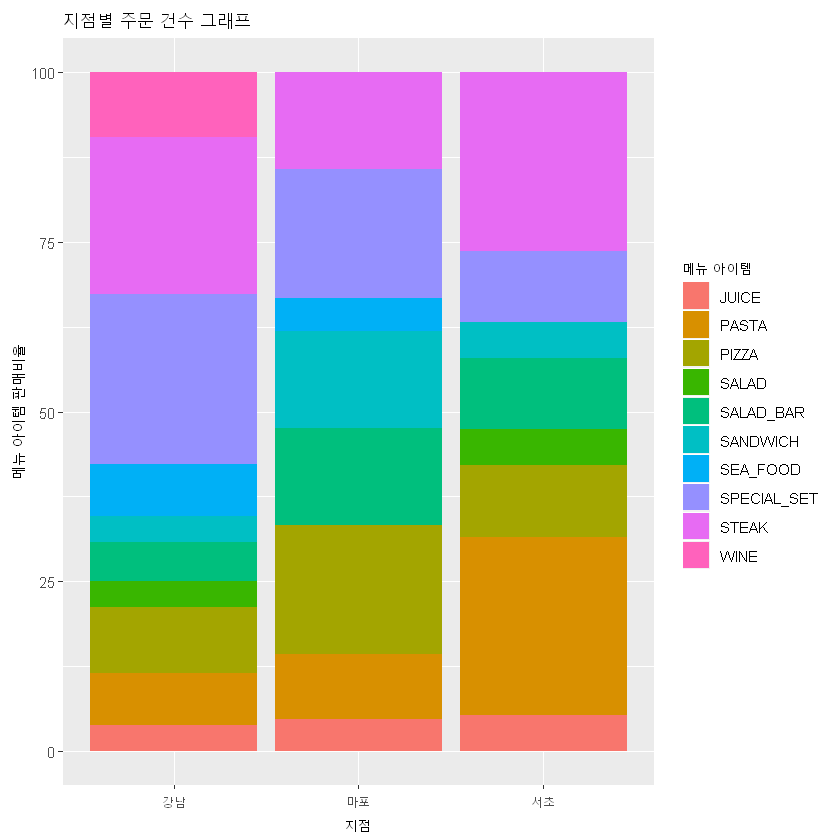

In [35]:
gg <- gg +
    labs(title = "지점별 주문 건수 그래프", x = "지점", y = "메뉴 아이템 판매비율", fill = "메뉴 아이템")
gg

In [39]:
df_rfm_join_1 <- inner_join(reservation_r, order_info_r, by = "reserv_no")

In [40]:
head(df_rfm_join_1)

reserv_no,reserv_date,reserv_time,customer_id,branch,visitor_cnt,cancel,order_no,item_id,quantity,sales
2019082701,20190827,1800,W1340914,마포,2,N,190827547272110010,M0001,2,48000
2019082602,20190826,1200,W341658,동작,5,N,190826137302710010,M0010,5,30000
2019082601,20190826,1800,W1328993,강북,4,N,190826137192910010,M0005,4,140000
2019082501,20190825,1800,W1340463,용산,2,N,190825107839310010,M0008,2,20000
2019082401,20190824,1200,W1344912,강동,3,N,190824137844710010,M0006,3,75000
2019082301,20190823,1800,W1344753,영등포,2,N,190823107844510010,M0004,1,25000


In [43]:
df_rfm_data <- df_rfm_join_1 %>%
    group_by(customer_id) %>%
    summarise(visit_sum = n_distinct(reserv_no), sales_sum = sum(sales) / 1000) %>%
    arrange(customer_id)


In [44]:
df_rfm_data

customer_id,visit_sum,sales_sum
W1327595,2,188
W1327803,2,210
W1328432,3,246
W1328505,5,287
W1328786,1,10
W1328985,2,178
W1328993,1,140
W1329560,1,24
W1329954,1,48
W1329962,2,48


In [45]:
summary(df_rfm_data)

 customer_id          visit_sum       sales_sum      
 Length:170         Min.   :1.000   Min.   :   6.00  
 Class :character   1st Qu.:1.000   1st Qu.:  40.75  
 Mode  :character   Median :1.000   Median : 100.00  
                    Mean   :1.982   Mean   : 146.81  
                    3rd Qu.:3.000   3rd Qu.: 192.00  
                    Max.   :8.000   Max.   :1006.00  

Warning message:
"Ignoring unknown parameters: sidth"

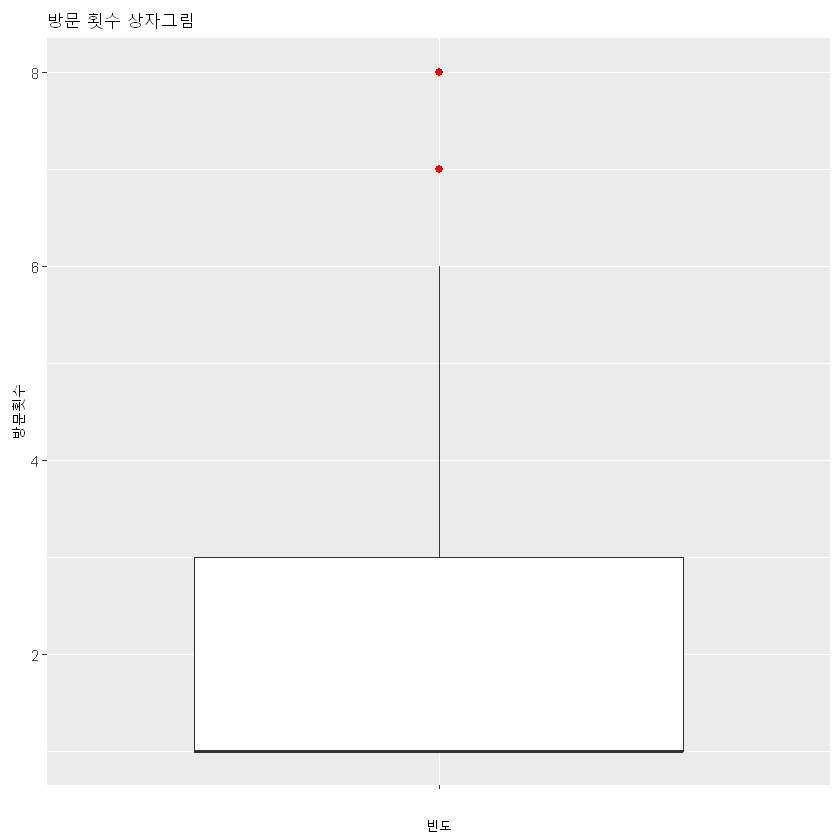

In [46]:
ggplot(df_rfm_data, aes(x = "",y = visit_sum))+
    geom_boxplot(sidth = 0.8, outlier.size = 2, outlier.colour = "red")+
    labs(title = "방문 횟수 상자그림", x = "빈도", y = "방문횟수")

In [48]:
quantile(df_rfm_data$visit_sum, probs = c(0.6, 0.9))

60% 90% 
  2   4

In [49]:
quantile(df_rfm_data$sales_sum, probs = c(0.6, 0.9))

60%   90% 
135.0 304.1

In [63]:
total_sum_data <- df_rfm_data %>%
    summarise(t_visit_sum = sum(visit_sum), t_sales_sum = sum(sales_sum))

In [66]:
loyalty_sum_data <- df_rfm_data %>%
    summarise(l_visit_sum = sum(ifelse(visit_sum > 2, visit_sum, 0)), 
              l_sales_sum = sum(ifelse(sales_sum > 135, sales_sum, 0)))

In [67]:
loyalty_sum_data / total_sum_data

l_visit_sum,l_sales_sum
0.5163205,0.7496093


In [68]:
df_join_1 <- inner_join(reservation_r, order_info_r, by = "reserv_no")

In [69]:
df_join_1

reserv_no,reserv_date,reserv_time,customer_id,branch,visitor_cnt,cancel,order_no,item_id,quantity,sales
2019082701,20190827,1800,W1340914,마포,2,N,190827547272110010,M0001,2,48000
2019082602,20190826,1200,W341658,동작,5,N,190826137302710010,M0010,5,30000
2019082601,20190826,1800,W1328993,강북,4,N,190826137192910010,M0005,4,140000
2019082501,20190825,1800,W1340463,용산,2,N,190825107839310010,M0008,2,20000
2019082401,20190824,1200,W1344912,강동,3,N,190824137844710010,M0006,3,75000
2019082301,20190823,1800,W1344753,영등포,2,N,190823107844510010,M0004,1,25000
2019082202,20190822,1800,W1333222,강서,2,N,190822567834210010,M0002,2,24000
2019082101,20190821,1800,W1337797,강서,6,N,190821137249810010,M0004,3,75000
2019082101,20190821,1800,W1337797,강서,6,N,190821137249810010,M0003,1,17000
2019081901,20190819,1200,W344059,양천,5,N,190819137293410010,M0004,3,75000


In [70]:
df_join_2 <- inner_join(df_f_join_1, item_r, by= "item_id")

In [71]:
df_join_2

reserv_no,reserv_date,reserv_time,customer_id,branch,visitor_cnt,cancel,order_no,item_id,quantity,sales,product_name,product_desc,category_id,price
2019082701,20190827,1800,W1340914,마포,2,N,190827547272110010,M0001,2,48000,SPECIAL_SET,온라인_전용상품,COMBO,24000
2019082602,20190826,1200,W341658,동작,5,N,190826137302710010,M0010,5,30000,JUICE,주스,BEVERAGE,6000
2019082601,20190826,1800,W1328993,강북,4,N,190826137192910010,M0005,4,140000,STEAK,스테이크,FOOD,35000
2019082501,20190825,1800,W1340463,용산,2,N,190825107839310010,M0008,2,20000,SANDWICH,샌드위치,FOOD,10000
2019082401,20190824,1200,W1344912,강동,3,N,190824137844710010,M0006,3,75000,SALAD_BAR,샐러드바,COMBO,25000
2019082301,20190823,1800,W1344753,영등포,2,N,190823107844510010,M0004,1,25000,SEA_FOOD,씨푸드,FOOD,25000
2019082202,20190822,1800,W1333222,강서,2,N,190822567834210010,M0002,2,24000,PASTA,파스타,FOOD,12000
2019082101,20190821,1800,W1337797,강서,6,N,190821137249810010,M0004,3,75000,SEA_FOOD,씨푸드,FOOD,25000
2019082101,20190821,1800,W1337797,강서,6,N,190821137249810010,M0003,1,17000,PIZZA,피자,FOOD,17000
2019081901,20190819,1200,W344059,양천,5,N,190819137293410010,M0004,3,75000,SEA_FOOD,씨푸드,FOOD,25000


In [72]:
target_item <- c("M0005", "M0009")

In [77]:
df_stime_order <- df_f_join_2 %>% 
    filter((item_id %in% target_item)) %>% 
    group_by(reserv_no) %>% 
    mutate(order_cnt = n()) %>%
    distinct(branch, reserv_no, order_cnt) %>% 
    filter(order_cnt == 2) %>% 
    arrange(branch)

In [79]:
df_stime_order

reserv_no,branch,order_cnt
2019123107,강남,2
2019122901,강남,2
2019122801,강남,2
2019122810,강동,2
2019122804,광진,2
2019112101,노원,2
2019091201,동대문,2
2019122703,동대문,2
2019112102,동작,2
2019123006,양천,2


In [88]:
stime_order_rsv_no <- df_stime_order$reserv_no

In [89]:
df_stime_sales <- df_f_join_2 %>%
    filter((reserv_no %in% stime_order_rsv_no) & (item_id %in% target_item)) %>%
    group_by(reserv_no, product_name) %>%          # 예약 번호와 메뉴 아이템으로 그룹화
    summarise(sales_amt = sum(sales) / 1000) %>%   # 매출 합계 요약 계산
    arrange(product_name, reserv_no)  

`summarise()` has grouped output by 'reserv_no'. You can override using the `.groups` argument.


In [91]:
df_stime_sales

reserv_no,product_name,sales_amt
2019091201,STEAK,70
2019112101,STEAK,280
2019112102,STEAK,280
2019120202,STEAK,420
2019122702,STEAK,70
2019122703,STEAK,70
2019122801,STEAK,175
2019122804,STEAK,70
2019122810,STEAK,70
2019122901,STEAK,140


In [94]:
steak <- df_stime_sales %>% 
        filter(product_name == "STEAK")
wine <- df_stime_sales %>% 
        filter(product_name == "WINE")

In [95]:
cor.test(steak$sales_amt, wine$sales_amt)


	Pearson's product-moment correlation

data:  steak$sales_amt and wine$sales_amt
t = 9.5423, df = 10, p-value = 2.438e-06
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.8244838 0.9859970
sample estimates:
      cor 
0.9492339 
